# Outline
---

## Early Severe Flood Prediciction

## Task Description
This notebook implements a machine learning to predict Severe Flood as WARNING OR MITIGATION SOLUTION

** Background Project:**
- How can we build an initial flood prediction simulation model that can process environmental, hydrological, and social variables to produce accurate flood probability predictions?

- Which factors are most influential in increasing flood risk based on machine learning models?

- How can these flood prediction models be applied as early flood detection systems in flood-prone areas of **Sumatra**?


## Dataset Description
---

**Note**

- This dataset is scraped from [Kaggle](https://www.kaggle.com/)
- [Dataset Resources](https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset/data)


**Description**
- The dataset contains of the following fields
- The dataset used in this study, sourced from flood.csv, contains multiple features relevant to flood prediction, including environmental factors and socio-economic indicators. The Dataset has 50000 rows and 21 columns.
- The dataset includes 21 numeric variables such as 'MonsoonIntensity,' 'TopographyDrainage,' 'RiverManagement,' 'Deforestation,' 'Urbanization,' 'ClimateChange,' 'DamsQuality,' 'Siltation,' 'AgriculturalPractices,' 'Encroachments,' 'IneffectiveDisasterPreparedness,' 'DrainageSystems,' 'CoastalVulnerability,' 'Landslides,' 'Watersheds,' 'DeterioratingInfrastructure,' 'PopulationScore,' 'WetlandLoss,' 'InadequatePlanning,' 'PoliticalFactors,' and 'FloodProbability.'

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`MonsoonIntensity`|`int`|Higher volumes of rain during monsoons increase the probability of floods.|
|`TopographyDrainage`|`int`|The drainage capacity based on the region's topography. Efficient drainage can help drain rainwater and reduce the risk of floods.|
|`RiverManagement`|`int`|The quality and effectiveness of river management practices. Proper river management, including dredging and bank maintenance, can improve water flow and reduce floods.|
|`Deforestation`|`int`|The extent of deforestation in the area. Deforestation reduces the soil's ability to absorb water, increasing surface runoff and the risk of floods.|
|`Urbanization`|`int`|The level of urbanization in the region. Urban areas have impermeable surfaces (asphalt, concrete), which reduce water infiltration, raising the risk of floods.|
|`ClimateChange`|`int`|The impact of climate change on the region. Climate change can lead to more extreme precipitation patterns, including torrential rains that can cause floods.|
|`DamsQuality`|`int`|The quality and maintenance status of dams. Well-maintained dams can control floods, and dams with structural problems can break and cause catastrophic floods.|
|`Siltation`|`int`|The extent of siltation in rivers and reservoirs. The accumulation of sediments reduces drainage capacity and increases the risk of floods.|
|`AgriculturalPractices`|`int`|The types and sustainability of agricultural practices. Unsustainable practices can increase the risk of floods.|
|`Encroachments`|`int`|The degree of encroachment on flood plains and natural waterways. Construction in flood-prone areas impedes natural water flow.|
|`IneffectiveDisasterPreparedness`|`int`|The lack of emergency plans, warning systems, and simulations increases flood impacts.|
|`DrainageSystems`|`int`|Well-maintained and adequately sized drainage systems help drain rainwater and reduce flood risk.|
|`CoastalVulnerability`|`int`|Low-lying coastal areas are susceptible to storm surges and sea level rise.|
|`Landslides`|`int`|Steep slopes and unstable soils are more prone to landslides.|
|`Watersheds`|`int`|Regions with more watersheds may have varying flood risks depending on conditions.|
|`DeterioratingInfrastructure`|`int`|Clogged culverts and damaged drainage channels increase flood risk.|
|`PopulationScore`|`int`|Densely populated areas can suffer more severe flood impacts.|
|`WetlandLoss`|`int`|Wetlands naturally absorb excess water and help prevent floods.|
|`InadequatePlanning`|`int`|Poor urban planning increases vulnerability to floods.|
|`PoliticalFactors`|`int`|Issues such as corruption and lack of will to invest in drainage systems worsen flood risk.|
|`FloodProbability`|`int`|The overall probability of flooding in the region. **(Target Variable)**|

</center>


#1. Importing data
---

In [1]:
import numpy as np
import pandas as pd

In [2]:
def read_data(fname):
    df = pd.read_csv(fname)
    print(f"Data shape: {df.shape}")
    return df

In [3]:
data = read_data(fname='flood.csv')

Data shape: (50000, 21)


In [4]:
data.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


# 2. Data Preprocessing

**The processing pipeline**
```
2.1 Input-Output Split
2.2 Train-Valid-Test Split
2.3 Feature Engineering the Data
```

## 2.1. Input-Output Split
---

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [5]:
def split_input_output(data, target_col):

    X = data.drop(columns=[target_col])
    y = data[target_col]
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    return X, y

In [6]:
X, y = split_input_output(data=data,
                          target_col='FloodProbability')

X shape: (50000, 20)
y shape: (50000,)


In [7]:
X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4


In [8]:
y.head()

,FloodProbability
0,0.450
1,0.475
2,0.515
3,0.520
4,0.475


## 2.2. Train-Valid-Test Split (6 pts)
---

- Now, I want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

- I make the splitting proportion train (80%), valid (10%), and test (10%)

In [9]:
from sklearn.model_selection import train_test_split

def split_train_test(X, y, test_size, seed):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    return X_train, X_test, y_train, y_test

In [10]:
# Split the data
# First, split the train & not train (80% train, 20% not train)
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, test_size=0.2, seed=123)

# Then, split the valid & test (50% valid of not_train, 50% test of not_train -> 10% valid, 10% test of original data)
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, test_size=0.5, seed=123)

X_train shape: (40000, 20)
y_train shape: (40000,)
X_test shape: (10000, 20)
y_test shape: (10000,)
X_train shape: (5000, 20)
y_train shape: (5000,)
X_test shape: (5000, 20)
y_test shape: (5000,)


In [11]:
# Validate
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.8
0.1
0.1


In [12]:
X_train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
2660,3,7,3,5,4,6,10,5,2,7,5,3,7,5,7,7,6,1,6,2
32815,6,3,1,6,4,6,3,4,4,3,6,2,3,8,7,5,3,9,6,4
35141,2,7,5,4,4,12,6,6,6,1,4,7,6,2,3,10,4,4,6,10
19390,6,2,3,3,3,7,5,4,2,5,7,5,8,3,0,10,9,7,6,7
34846,4,8,4,3,2,5,9,4,2,3,7,6,3,6,4,1,12,2,7,8


## EDA before Preprocessing .

- Find the number of missing values

In [13]:
100 * (X_train.isna().sum(0) / len(X_train))

,0
MonsoonIntensity,0.0
TopographyDrainage,0.0
RiverManagement,0.0
Deforestation,0.0
Urbanization,0.0
ClimateChange,0.0
DamsQuality,0.0
Siltation,0.0
AgriculturalPractices,0.0
Encroachments,0.0


- There is no any missing value

- check the numerical features distribution

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

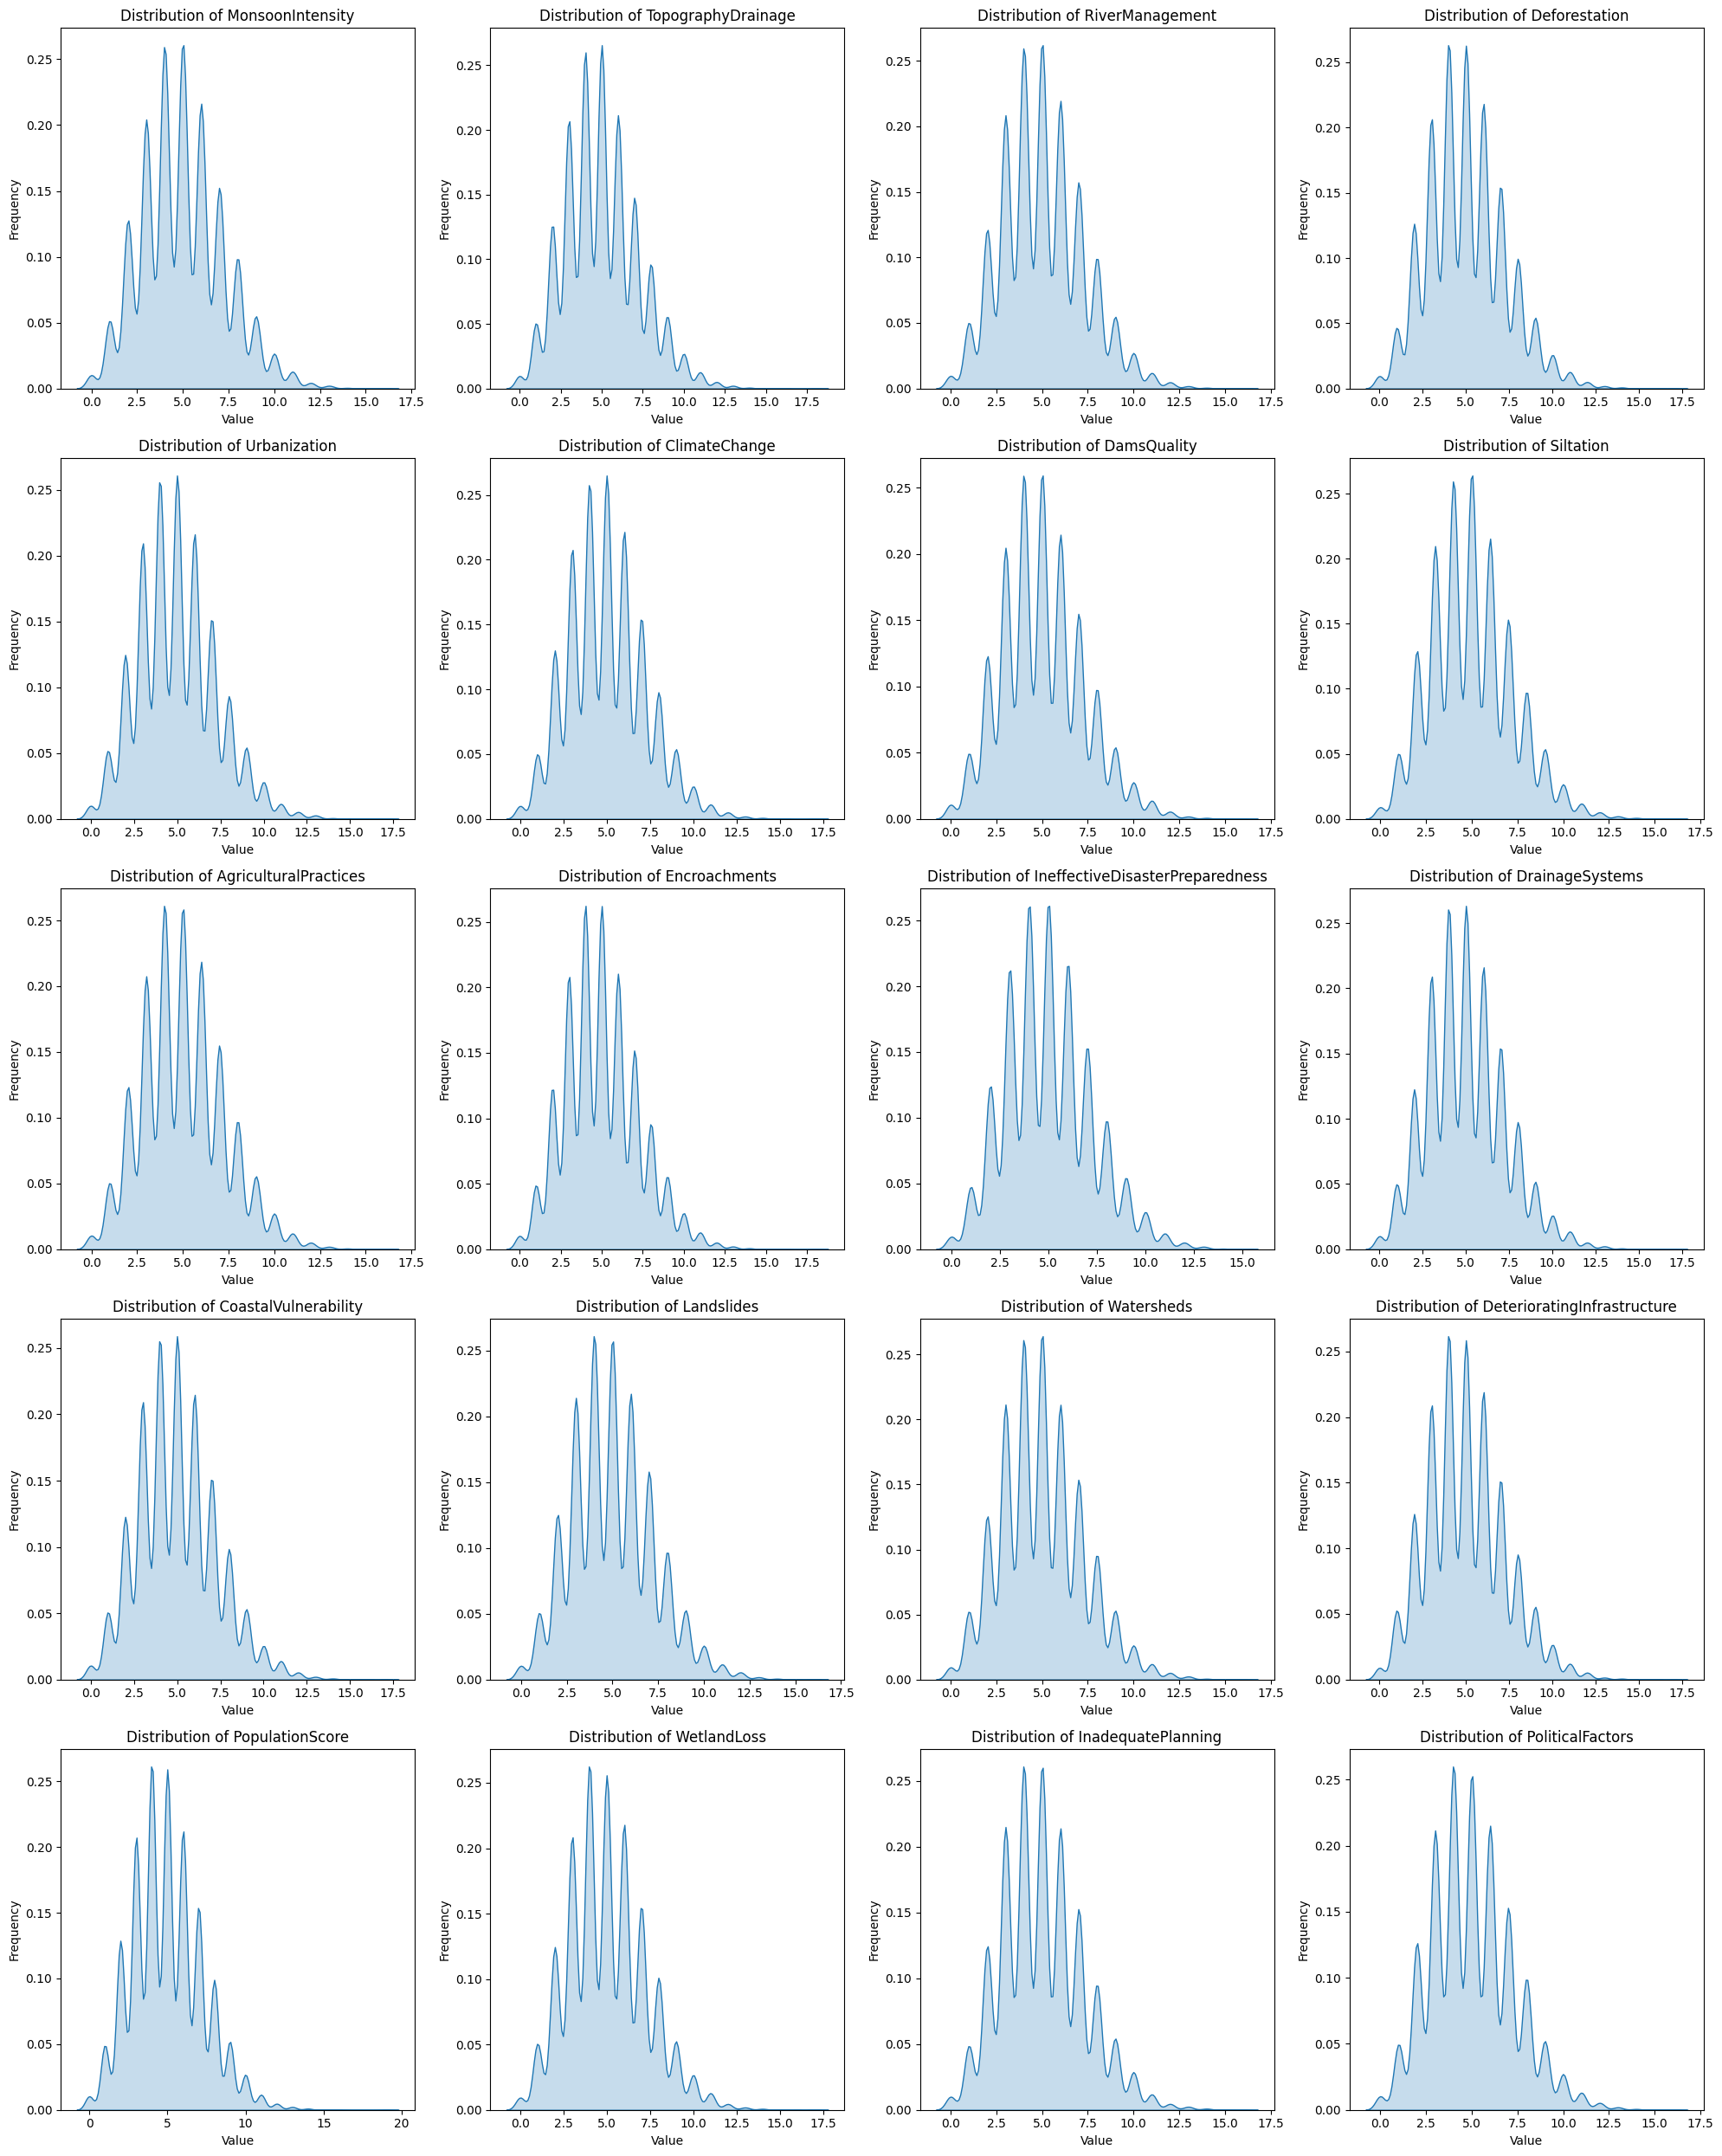

In [15]:
num_cols = X_train.shape[1]
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axes = ax.flatten()

for i, col in enumerate(X_train.columns):
    sns.kdeplot(X_train[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Remove unused subplots
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


each feature has a variable and non-extreme value distribution

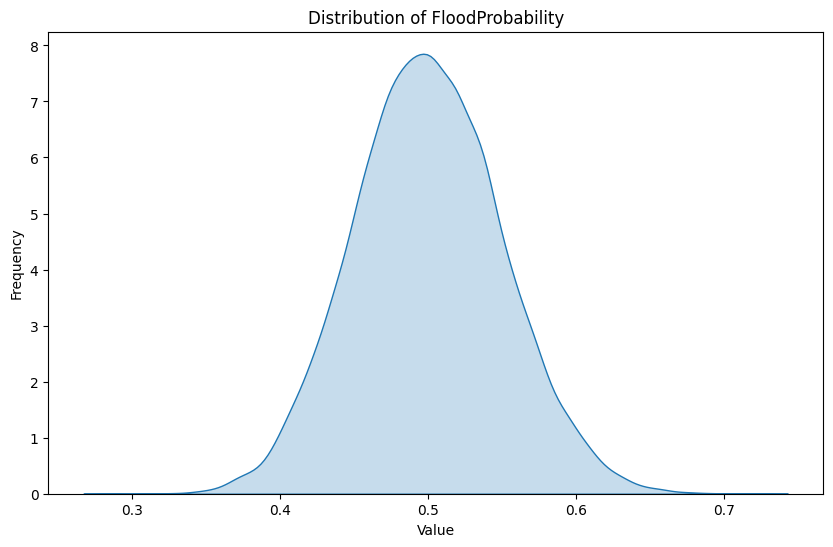

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.kdeplot(y_train, fill=True)

plt.title("Distribution of FloodProbability")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

by this data we know that data has been get standarization.

- Explore the relation between features and target

In [17]:
# Concat the data first
train_data = pd.concat((X_train, y_train), axis=1)
train_data.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
2660,3,7,3,5,4,6,10,5,2,7,...,3,7,5,7,7,6,1,6,2,0.505
32815,6,3,1,6,4,6,3,4,4,3,...,2,3,8,7,5,3,9,6,4,0.465
35141,2,7,5,4,4,12,6,6,6,1,...,7,6,2,3,10,4,4,6,10,0.545
19390,6,2,3,3,3,7,5,4,2,5,...,5,8,3,0,10,9,7,6,7,0.510
34846,4,8,4,3,2,5,9,4,2,3,...,6,3,6,4,1,12,2,7,8,0.500


In [18]:
# Create a heatmap
# Get the correlation matrix
corr = train_data.corr()
corr

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.002420,0.002702,-0.003697,0.007704,0.005420,0.004664,-0.006274,-0.000985,-0.001146,...,0.000117,-0.003582,0.002033,-0.008779,0.003919,0.000700,0.006768,0.001235,0.004323,0.227046
TopographyDrainage,-0.002420,1.000000,0.004116,-0.001955,0.000818,-0.001384,-0.002899,0.009207,-0.001245,-0.005152,...,-0.007574,-0.001128,-0.003998,0.007701,-0.000111,0.006671,0.002050,0.004133,0.005599,0.227568
RiverManagement,0.002702,0.004116,1.000000,0.001758,-0.006243,0.007314,0.010900,-0.000985,0.003079,0.006804,...,0.004707,0.002842,-0.000659,0.000557,0.003869,0.000751,-0.002387,0.004400,-0.007390,0.231521
Deforestation,-0.003697,-0.001955,0.001758,1.000000,-0.008686,0.002782,0.001938,0.001585,0.007700,-0.001263,...,-0.004022,-0.004648,0.005642,0.000034,-0.000955,0.000337,0.002520,0.000344,0.000120,0.222876
Urbanization,0.007704,0.000818,-0.006243,-0.008686,1.000000,0.009931,-0.001978,-0.003811,-0.001808,-0.014080,...,-0.005254,-0.001706,-0.004598,-0.001548,0.003049,0.004126,0.011320,-0.002323,-0.002932,0.221250
ClimateChange,0.005420,-0.001384,0.007314,0.002782,0.009931,1.000000,-0.002839,0.001148,-0.005372,0.001727,...,-0.005078,-0.001837,0.001133,0.004848,-0.000135,-0.008392,-0.000611,0.002097,-0.005028,0.222275
DamsQuality,0.004664,-0.002899,0.010900,0.001938,-0.001978,-0.002839,1.000000,0.001668,0.002048,-0.000581,...,0.003324,-0.010032,-0.001693,0.008910,-0.007328,0.008264,-0.000509,0.001652,0.001007,0.227326
Siltation,-0.006274,0.009207,-0.000985,0.001585,-0.003811,0.001148,0.001668,1.000000,-0.003535,0.001666,...,-0.007437,0.000145,-0.000987,0.007080,0.002344,-0.005159,0.005963,0.013831,-0.000867,0.226338
AgriculturalPractices,-0.000985,-0.001245,0.003079,0.007700,-0.001808,-0.005372,0.002048,-0.003535,1.000000,-0.007015,...,0.000839,-0.003651,0.002575,0.003031,-0.000952,-0.003790,-0.008500,-0.001317,-0.002903,0.218916
Encroachments,-0.001146,-0.005152,0.006804,-0.001263,-0.014080,0.001727,-0.000581,0.001666,-0.007015,1.000000,...,-0.007166,-0.007803,-0.001097,0.004207,0.003335,0.003245,0.003491,0.000185,-0.011650,0.217530


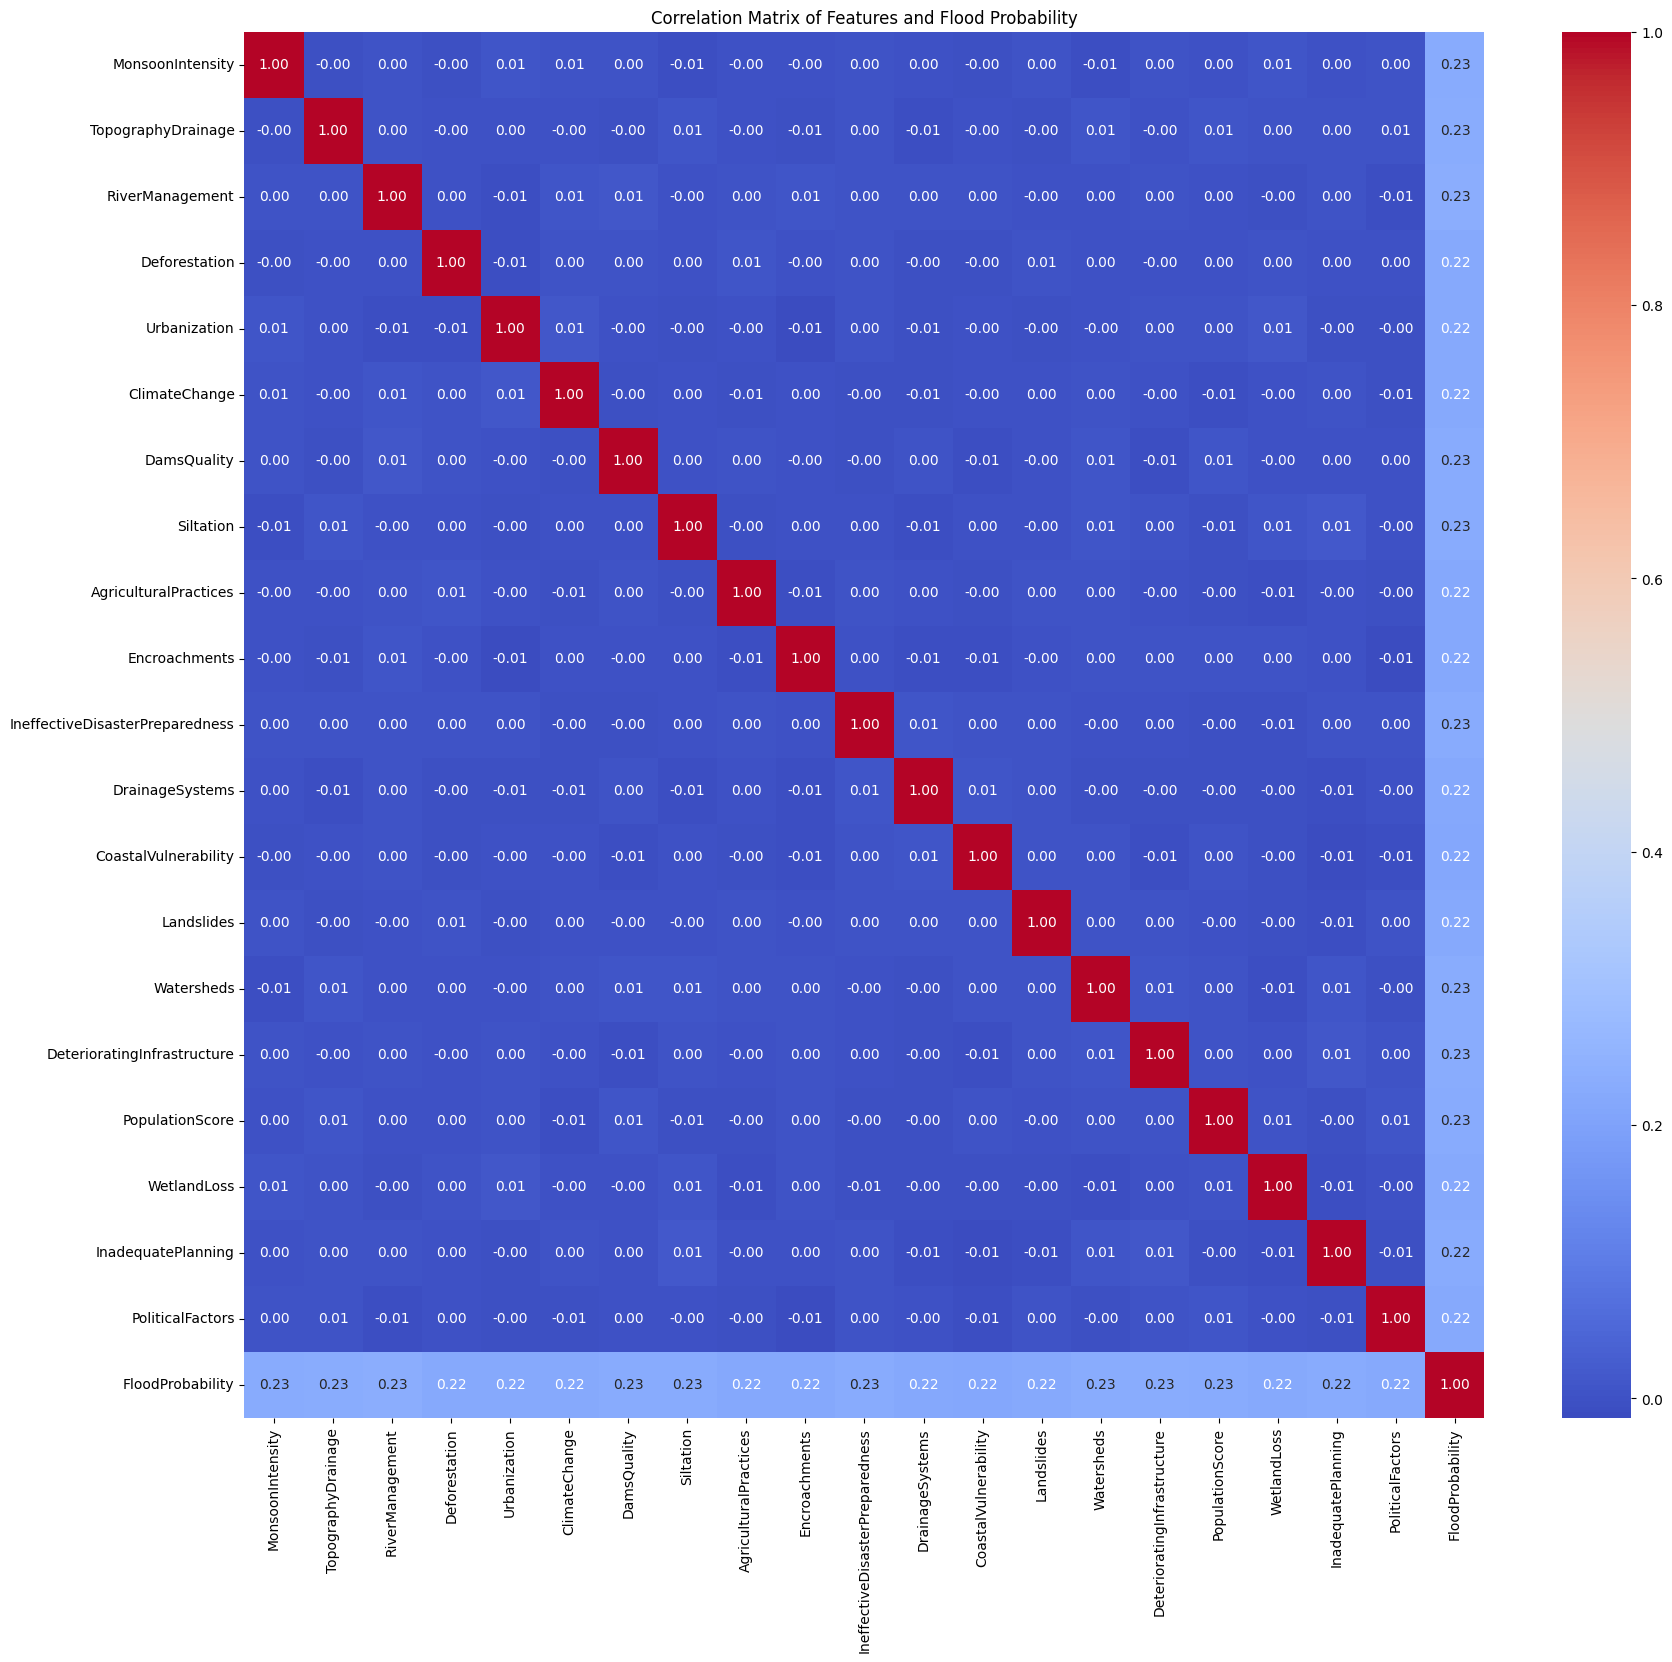

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Flood Probability')
plt.show()

## 2.3. Feature engineering the data

In [20]:
train_data.dtypes

,0
MonsoonIntensity,int64
TopographyDrainage,int64
RiverManagement,int64
Deforestation,int64
Urbanization,int64
ClimateChange,int64
DamsQuality,int64
Siltation,int64
AgriculturalPractices,int64
Encroachments,int64


In [21]:
train_data.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,4.994675,4.989275,5.018375,5.013550,4.990975,4.985225,5.01825,4.987400,5.005075,5.003300,...,5.001750,5.002375,4.982075,4.978175,4.985300,4.986550,5.002875,4.991500,4.992775,0.499672
std,2.237213,2.245414,2.228500,2.227777,2.246891,2.222449,2.24733,2.229432,2.234530,2.246556,...,2.234932,2.250877,2.227247,2.234754,2.232053,2.238447,2.233213,2.236784,2.244805,0.050051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.000000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.000000,17.000000,19.000000,17.000000,16.000000,16.000000,0.725000


by looking types and statiscal information, we can see all columns hasn't have outlier, and all data has been standarization

# 3. Training Machine Learning Models

```
3.1 Define Metrics
3.2 Define Model Baseline
3.3 Model search & hyperparameter tuning
3.4 Model Selection
```

## 3.1 Define Metric

For regression problems, we'll use multiple metrics to evaluate model performance:
- **RMSE (Root Mean Squared Error)**: Measures the average magnitude of errors
- **MAE (Mean Absolute Error)**: Measures the average absolute difference
- **R² Score**: Measures the proportion of variance explained by the model

## 3.2 Define Model Baseline

We'll create a simple baseline model using mean prediction and Linear Regression as a baseline.


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print()

    return {
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

# Baseline 1: Mean prediction
baseline_mean = DummyRegressor(strategy='mean')
baseline_mean.fit(X_train, y_train)
y_pred_baseline_mean = baseline_mean.predict(X_valid)

print("Baseline Model 1: Mean Prediction")
baseline_mean_metrics = evaluate_model(y_valid, y_pred_baseline_mean, "Baseline (Mean)")

Baseline Model 1: Mean Prediction
Baseline (Mean) Performance:
  RMSE: 0.0499
  MAE: 0.0397
  R² Score: -0.0001



## 3.3 Model search & hyperparameter tuning

We'll try multiple advanced models and tune their hyperparameters:
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor
- Support Vector Regressor

In [24]:
#install xgboost if you haven't install
!pip install xgboost

In [25]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Dictionary to store all models and their performance
models_performance = {}

# 1. Random Forest Regressor
print("=" * 50)
print("Training Random Forest Regressor...")
print("=" * 50)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=123)
rf_search = RandomizedSearchCV(
    rf_model,
    rf_param_grid,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=123,
    verbose=1
)
rf_search.fit(X_train, y_train)

rf_best = rf_search.best_estimator_
y_pred_rf = rf_best.predict(X_valid)
rf_metrics = evaluate_model(y_valid, y_pred_rf, "Random Forest (Best)")
models_performance['Random Forest'] = {
    'model': rf_best,
    'metrics': rf_metrics
}

# 2. Gradient Boosting Regressor
print("=" * 50)
print("Training Gradient Boosting Regressor...")
print("=" * 50)

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10]
}

gb_model = GradientBoostingRegressor(random_state=123)
gb_search = RandomizedSearchCV(
    gb_model,
    gb_param_grid,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=123,
    verbose=1
)
gb_search.fit(X_train, y_train)

gb_best = gb_search.best_estimator_
y_pred_gb = gb_best.predict(X_valid)
gb_metrics = evaluate_model(y_valid, y_pred_gb, "Gradient Boosting (Best)")
models_performance['Gradient Boosting'] = {
    'model': gb_best,
    'metrics': gb_metrics
}

# 3. XGBoost Regressor
print("=" * 50)
print("Training XGBoost Regressor...")
print("=" * 50)

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=123)
xgb_search = RandomizedSearchCV(
    xgb_model,
    xgb_param_grid,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=123,
    verbose=1
)
xgb_search.fit(X_train, y_train)

xgb_best = xgb_search.best_estimator_
y_pred_xgb = xgb_best.predict(X_valid)
xgb_metrics = evaluate_model(y_valid, y_pred_xgb, "XGBoost (Best)")
models_performance['XGBoost'] = {
    'model': xgb_best,
    'metrics': xgb_metrics
}

# 4. Support Vector Regressor (with smaller parameter grid for faster training)
print("=" * 50)
print("Training Support Vector Regressor...")
print("=" * 50)

svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'epsilon': [0.01, 0.1, 0.2]
}

svr_model = SVR()
svr_search = RandomizedSearchCV(
    svr_model,
    svr_param_grid,
    n_iter=15,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=123,
    verbose=1
)
svr_search.fit(X_train, y_train)

svr_best = svr_search.best_estimator_
y_pred_svr = svr_best.predict(X_valid)
svr_metrics = evaluate_model(y_valid, y_pred_svr, "SVR (Best)")
models_performance['SVR'] = {
    'model': svr_best,
    'metrics': svr_metrics
}

Training Random Forest Regressor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Forest (Best) Performance:
  RMSE: 0.0256
  MAE: 0.0200
  R² Score: 0.7369

Training Gradient Boosting Regressor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Gradient Boosting (Best) Performance:
  RMSE: 0.0070
  MAE: 0.0056
  R² Score: 0.9803

Training XGBoost Regressor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
XGBoost (Best) Performance:
  RMSE: 0.0080
  MAE: 0.0063
  R² Score: 0.9743

Training Support Vector Regressor...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
SVR (Best) Performance:
  RMSE: 0.0026
  MAE: 0.0020
  R² Score: 0.9973



## 3.4 Model Selection

Compare all models based on validation performance and select the best one.

In [48]:
# Compare all models on validation set
print("=" * 70)
print("MODEL COMPARISON ON VALIDATION SET")
print("=" * 70)
print()

# Add mean baseline to models_performance
models_performance['Baseline Mean Probability'] = {
    'model': baseline_mean,
    'metrics': baseline_mean_metrics
}

# Create comparison dataframe from the models_performance dictionary
comparison_data = []
for model_name, model_info in models_performance.items():
    comparison_data.append({
        'Model': model_name,
        'RMSE': model_info['metrics']['rmse'],
        'MAE': model_info['metrics']['mae'],
        'R² Score': model_info['metrics']['r2']
    })

comparison_df = pd.DataFrame(comparison_data)
# Sort to find the best model (lowest RMSE)
comparison_df = comparison_df.sort_values('RMSE').reset_index(drop=True)
print(comparison_df.to_string(index=False))
print()

# Select the best model (lowest RMSE) from the comparison
best_model_name = comparison_df.iloc[0]['Model']
best_model = models_performance[best_model_name]['model']

# Explicitly define the actual baseline for comparison as the Mean Prediction Baseline
best_baseline_name = 'Baseline Mean Probability'
best_baseline = models_performance[best_baseline_name]['model']

print("=" * 70)
print(f"BEST MODEL SELECTED: {best_model_name}")
print("=" * 70)
print(f"Validation RMSE: {comparison_df.iloc[0]['RMSE']:.4f}")
print(f"Validation MAE: {comparison_df.iloc[0]['MAE']:.4f}")
print(f"Validation R²: {comparison_df.iloc[0]['R² Score']:.4f}")


MODEL COMPARISON ON VALIDATION SET

                    Model     RMSE      MAE  R² Score
                      SVR 0.002579 0.001997  0.997330
        Gradient Boosting 0.007011 0.005565  0.980258
                  XGBoost 0.008001 0.006321  0.974288
            Random Forest 0.025593 0.020023  0.736921
Baseline Mean Probability 0.049899 0.039663 -0.000063

BEST MODEL SELECTED: SVR
Validation RMSE: 0.0026
Validation MAE: 0.0020
Validation R²: 0.9973






##4.1 Model performance on test data

In [49]:
# Evaluate best model on test set
print("=" * 70)
print("BEST MODEL PERFORMANCE ON TEST SET")
print("=" * 70)
print()

y_pred_test = best_model.predict(X_test)
test_metrics = evaluate_model(y_test, y_pred_test, f"{best_model_name} (Test Set)")

# Store test metrics
test_performance = {
    'model_name': best_model_name,
    'rmse': test_metrics['rmse'],
    'mae': test_metrics['mae'],
    'r2': test_metrics['r2']
}


BEST MODEL PERFORMANCE ON TEST SET

SVR (Test Set) Performance:
  RMSE: 0.0026
  MAE: 0.0020
  R² Score: 0.9973



## 4.2 Compare Model Baseline & Selected Model

Compare the baseline model and the best selected model on test data.


In [50]:
# Evaluate baseline on test set
print("=" * 70)
print("BASELINE MODEL PERFORMANCE ON TEST SET")
print("=" * 70)
print()

y_pred_baseline_test = best_baseline.predict(X_test)
baseline_test_metrics = evaluate_model(y_test, y_pred_baseline_test, f"{best_baseline_name} (Test Set)")

# Create comparison table
print("=" * 70)
print("FINAL COMPARISON: BASELINE vs BEST MODEL (Test Set)")
print("=" * 70)
print()

final_comparison = pd.DataFrame({
    'Model': [best_baseline_name, best_model_name],
    'RMSE': [baseline_test_metrics['rmse'], test_metrics['rmse']],
    'MAE': [baseline_test_metrics['mae'], test_metrics['mae']],
    'R² Score': [baseline_test_metrics['r2'], test_metrics['r2']]
})

print(final_comparison.to_string(index=False))
print()

# Calculate improvement
rmse_improvement = ((baseline_test_metrics['rmse'] - test_metrics['rmse']) / baseline_test_metrics['rmse']) * 100
mae_improvement = ((baseline_test_metrics['mae'] - test_metrics['mae']) / baseline_test_metrics['mae']) * 100
r2_improvement = ((test_metrics['r2'] - baseline_test_metrics['r2']) / abs(baseline_test_metrics['r2'])) * 100

print(f"Improvement over baseline:")
print(f"  RMSE: {rmse_improvement:.2f}% reduction")
print(f"  MAE: {mae_improvement:.2f}% reduction")
print(f"  R²: {r2_improvement:.2f}% increase")


BASELINE MODEL PERFORMANCE ON TEST SET

Baseline Mean Probability (Test Set) Performance:
  RMSE: 0.0500
  MAE: 0.0398
  R² Score: -0.0001

FINAL COMPARISON: BASELINE vs BEST MODEL (Test Set)

                    Model     RMSE      MAE  R² Score
Baseline Mean Probability 0.050034 0.039834 -0.000105
                      SVR 0.002580 0.002001  0.997342

Improvement over baseline:
  RMSE: 94.84% reduction
  MAE: 94.98% reduction
  R²: 948742.58% increase


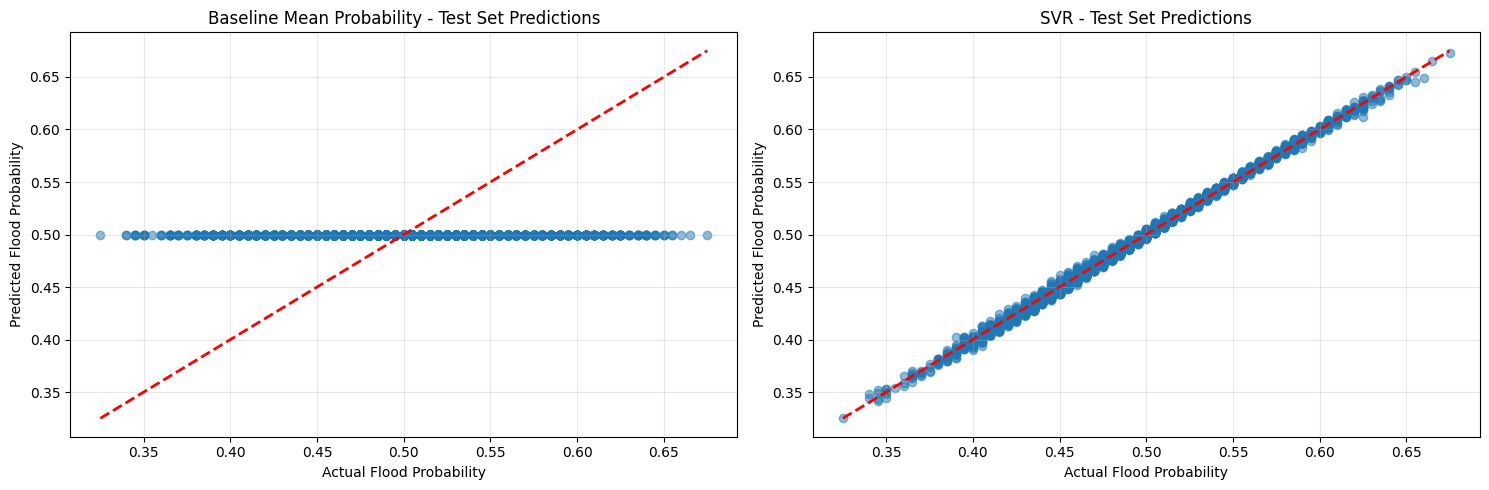

In [51]:
# Visualize predictions vs actual values
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Baseline predictions
axes[0].scatter(y_test, y_pred_baseline_test, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Flood Probability')
axes[0].set_ylabel('Predicted Flood Probability')
axes[0].set_title(f'{best_baseline_name} - Test Set Predictions')
axes[0].grid(True, alpha=0.3)

# Best model predictions
axes[1].scatter(y_test, y_pred_test, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Flood Probability')
axes[1].set_ylabel('Predicted Flood Probability')
axes[1].set_title(f'{best_model_name} - Test Set Predictions')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [56]:
import pickle
from google.colab import files

# Save the best model to a file
model_filename = 'best_flood_prediction_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved as {model_filename}")

# Provide a link to download the file
files.download(model_filename)

Model saved as best_flood_prediction_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>